<a href="https://colab.research.google.com/github/randi-source/DS-Introduction/blob/main/Reduce_Customer_Churn_%26_Increase_Retention_Rates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Reduct Customer Churn and Increase Retention Rates**

Imagine you have a cozy cafe in Jakarta which facing stiff competition. Some regular customers are **drifting away to other cafés**, and the owner wants to keep them coming back. On the other hand, you hold your customer data from using web application

### **Problem Statement**
About 50% customers does not come back after 7th purchase on your coffee shop

### **Solution**
Use AI/ML approach to understand churn customer behaviour

## **Customer Data on Loyalty Program**

| Feature Name                         | Feature Type   | Description                                              | Example Values                           |
|--------------------------------------|----------------|----------------------------------------------------------|------------------------------------------|
| Visit Frequency                      | Numeric        | Number of visits per month                                | 5, 10, 15                                |
| Days Since Last Loyalty Program Interaction                | Numeric        | Days since the customer last interacted with the loyalty program (e.g., earning or redeeming loyalty points).                                    | 2, 15, 30                                |
| Purchase Recency                     | Numeric        | Days since last purchase                                 | 1, 7, 21                                 |
| Average Spend per Visit              | Numeric        | Average amount spent per visit (in local currency)        | 50K, 75K, 100K                           |
| Loyalty Points Earned (Last X Days)  | Numeric        | Points accumulated in the last X days                     | 0, 100, 500                              |
| Loyalty Points Redeemed (Last X Days)| Numeric        | Points used in the last X days                            | 0, 200, 300                              |
| Total Loyalty Points Balance         | Numeric        | Total unused loyalty points                              | 500, 1000, 2000                          |
| Most Purchased Product Category      | Categorical    | The product category the customer buys the most          | "Coffee", "Pastries", "Lunch"            |
| Change in Product Category           | Boolean        | Whether the customer changed their usual product category| 0 (No), 1 (Yes)                          |
| Time of Visit (Peak/Off-Peak)        | Categorical    | Whether customer visits during peak or off-peak hours    | "Morning", "Afternoon", "Evening"        |
| Preferred Order Method               | Categorical    | The primary method of ordering                           | "Dine-in", "Takeaway", "Delivery"        |
| Change in Order Method               | Boolean        | Whether the customer changed their preferred order method| 0 (No), 1 (Yes)                          |
| Number of Complaints (Last X Days)   | Numeric        | Count of complaints filed in the last X days             | 0, 1, 3                                  |
| Sentiment of Last Review/Feedback    | Categorical    | Sentiment score from customer feedback                   | "Positive", "Neutral", "Negative"        |
| Special Event Engagement             | Boolean        | Whether the customer participated in a special event in the last 6 months | 0 (No), 1 (Yes) |
| Churn Label (Target Variable)        | Boolean        | Whether the customer churned (for supervised ML)         | 0 (No), 1 (Yes)                          |


## 1. Data preparation

Prepare the data by loading data and converting data types to appropriate formats.

**Example:** \
Special Event Engagement -> 0 or 1 -> detected as Number -> but it is actually No & Yes -> Convert to Boolean (False or True)


In [1]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv('customer_churn_data.csv', sep=';')

# Convert numeric columns to numeric types, coercing errors to NaN
numeric_cols = ['Visit Frequency', 'Days Since Last Loyalty Program Interaction', 'Purchase Recency', 'Average Spend per Visit', 'Loyalty Points Earned (Last X Days)', 'Loyalty Points Redeemed (Last X Days)', 'Total Loyalty Points Balance', 'Number of Complaints (Last X Days)']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Convert categorical columns to category type
categorical_cols = ['Most Purchased Product Category', 'Change in Product Category', 'Time of Visit (Peak/Off-Peak)', 'Preferred Order Method', 'Change in Order Method', 'Sentiment of Last Review/Feedback', 'Special Event Engagement', 'Churn Label']
for col in categorical_cols:
    df[col] = df[col].astype('category')

display(df.head())
display(df.info())

FileNotFoundError: [Errno 2] No such file or directory: 'customer_churn_data.csv'

## 2. Data splitting

Select which feature to use for ML and split the data into training and testing sets.

**Training sets:** data used for Machine Learning to understand your customer churn behaviour \
**Test sets:** data used for Machine Learning test the understanding upon your customer churn behaviour


In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop(['Churn Label', 'Average Spend per Visit',
       'Loyalty Points Earned (Last X Days)',
       'Loyalty Points Redeemed (Last X Days)', 'Total Loyalty Points Balance',
       'Most Purchased Product Category', 'Change in Product Category',
       'Time of Visit (Peak/Off-Peak)', 'Preferred Order Method',
       'Change in Order Method', 'Number of Complaints (Last X Days)',
       'Sentiment of Last Review/Feedback', 'Special Event Engagement'], axis=1)
y = df['Churn Label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shapes of the resulting datasets
print("Training Sets")
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print()
print("Test Sets")
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Training Sets
Shape of X_train: (8000, 3)
Shape of y_train: (8000,)

Test Sets
Shape of X_test: (2000, 3)
Shape of y_test: (2000,)


## 3. Model training

Training Machine Learning model to understand the data.

In this context, it means to make Machine Learning model understand how to differenciate between customer churn and not churn from your customer loyalty data


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the decision tree classifier with default parameters
dt_model = DecisionTreeClassifier()

# Train the model using the training data
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

## 4. Model evaluation

Evaluate the initial Machine Learning model's performance on the test data using accuracy.

**Accuracy:** \
from x amount of test data, how many x times Machine Learning model correctly predict, whether your customer gonna churn or not

In [ ]:
from sklearn.metrics import accuracy_score

# Make predictions on the test data
y_pred = dt_model.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Accuracy of the decision tree model: {accuracy}")

Accuracy of the decision tree model: 0.7035


## 5. Model optimization

Optimize Machine Learning model to better predict, whether customer in test data gonna churn or not, measured by accuracy

**Note:** \
If the accuracy increase, then your optimized Machine Learning model is better to differenciate between churn or not churn customer!


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': range(2, 11),
    'min_samples_split': range(2, 11),
    'min_samples_leaf': range(1, 6)
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator
best_dt_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Make predictions on the test set using the best model
y_pred_best = best_dt_model.predict(X_test)

# Calculate and print the accuracy of the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Accuracy of the best decision tree model: {accuracy_best}")

Best hyperparameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy of the best decision tree model: 0.775


## 6. Model evaluation

Evaluate the optimized model and compare its accuracy to the initial Machine Learning model's accuracy.


In [ ]:
from sklearn.metrics import accuracy_score

# Predict on the test set using the optimized model
y_pred_best = best_dt_model.predict(X_test)

# Calculate the accuracy of the optimized model
accuracy_best = accuracy_score(y_test, y_pred_best)

# Print the accuracy of the initial decision tree model (from a previous step)
print(f"Accuracy of the initial decision tree model: {accuracy}")

# Print the accuracy of the optimized model
print(f"Accuracy of the optimized decision tree model: {accuracy_best}")

# Compare the accuracies
if accuracy_best > accuracy:
    print("The optimized model performs better than the initial model.")
elif accuracy_best < accuracy:
    print("The optimized model performs worse than the initial model.")
else:
    print("The optimized model performs the same as the initial model.")

Accuracy of the initial decision tree model: 0.7035
Accuracy of the optimized decision tree model: 0.775
The optimized model performs better than the initial model.


## 7. Data visualization

Visualize what is the logic behind Machine Learning model, how this model able to predict whether customer gonna churn or not.


<ipython-input-83-de5b5b292299>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette="viridis")


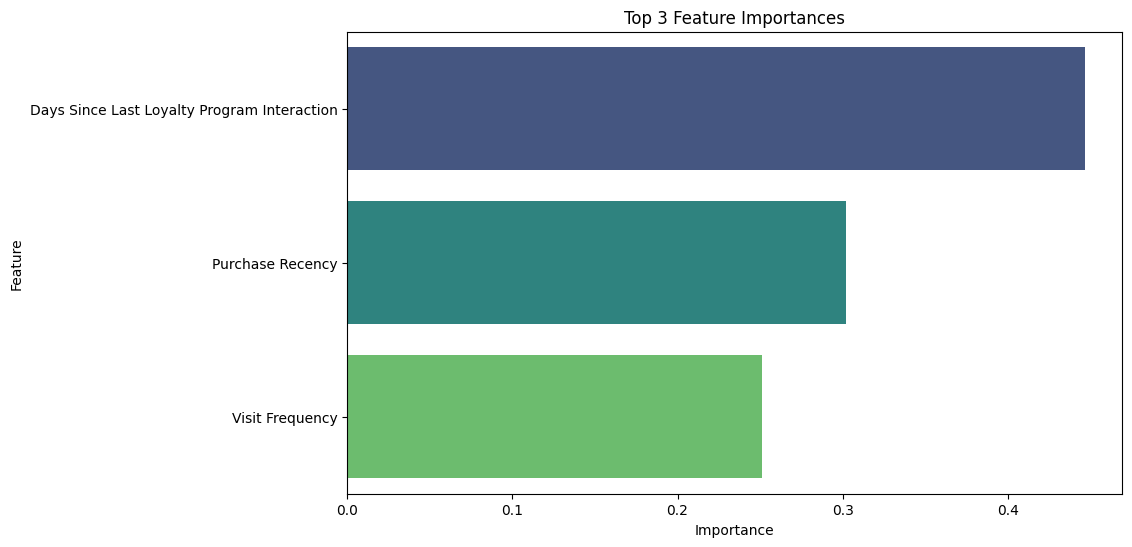

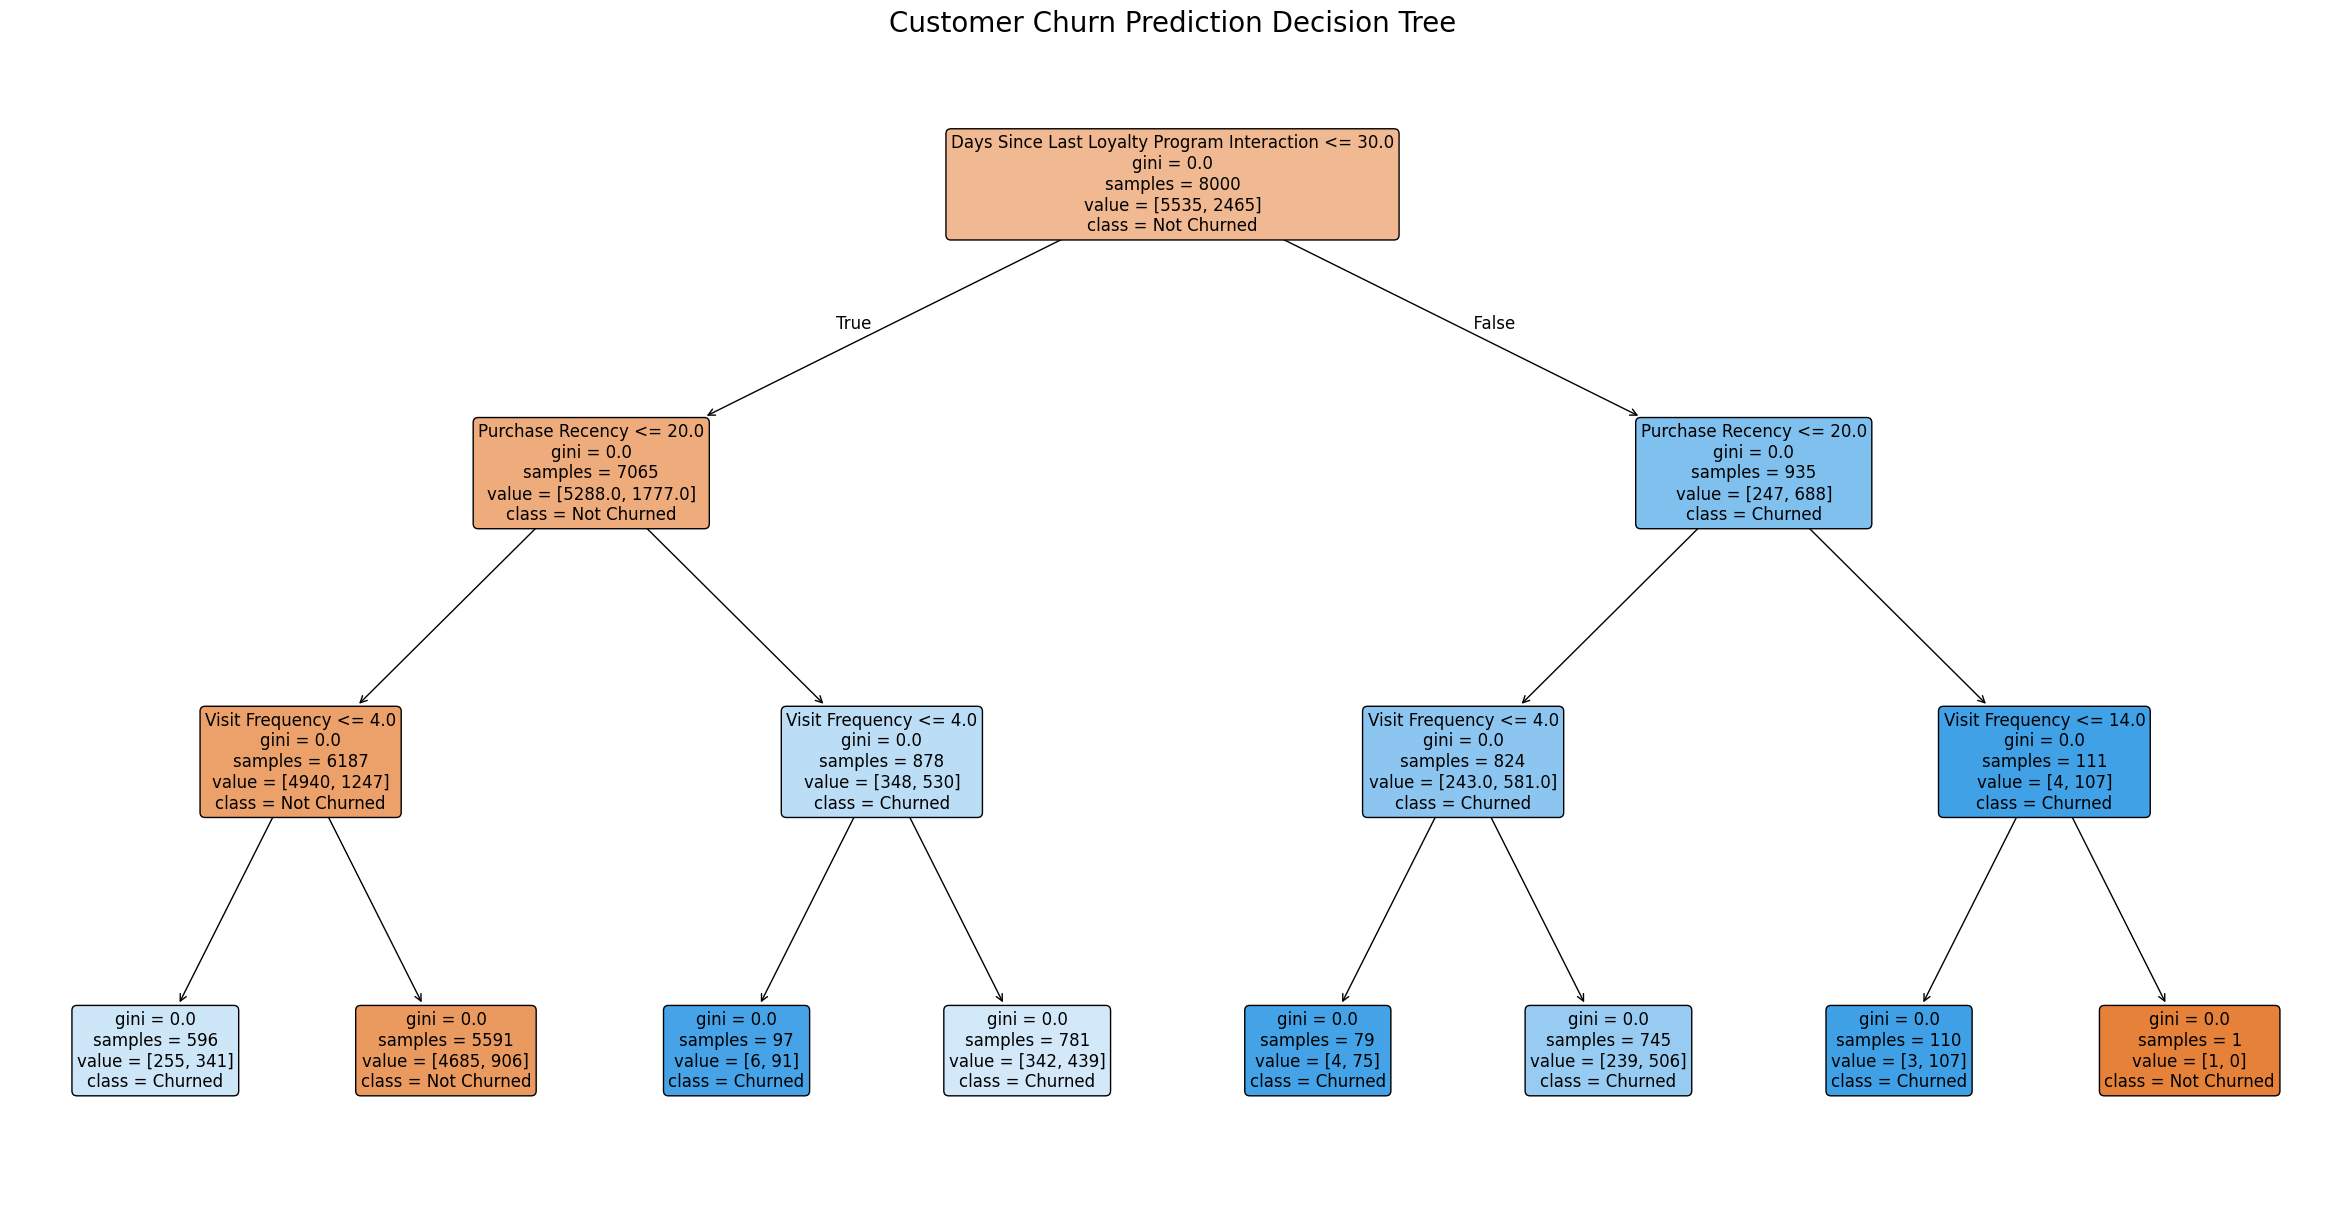

<ipython-input-83-de5b5b292299>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn Label', y=feature, data=pd.concat([X_test, y_test], axis=1), palette="Set3")
<ipython-input-83-de5b5b292299>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn Label', y=feature, data=pd.concat([X_test, y_test], axis=1), palette="Set3")
<ipython-input-83-de5b5b292299>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn Label', y=feature, data=pd.concat([X_test, y_test], axis=1), palette="Set3")


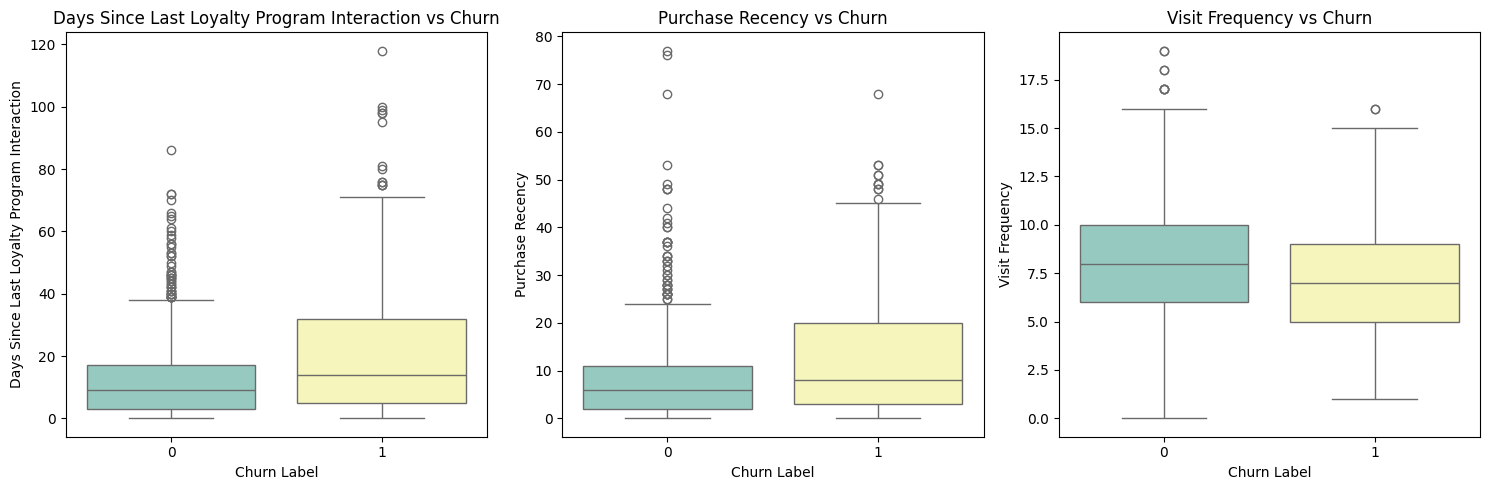

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import seaborn as sns

# Visualize feature importances
feature_importances = best_dt_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette="viridis")
plt.title('Top 3 Feature Importances')
plt.savefig('feature_importance.png')
plt.show()

# Visualize the decision tree
# plt.figure(figsize=(20, 10))
# plot_tree(best_dt_model, feature_names=X_train.columns, class_names=['0', '1'], filled=True, rounded=True)
# plt.savefig('decision_tree.png')
# plt.show()

# Visualize the decision tree with improved readability
plt.figure(figsize=(30, 15))  # Increased figure size for better visibility
plot_tree(best_dt_model,
          feature_names=X_train.columns,
          class_names=['Not Churned', 'Churned'],  # More descriptive class names
          filled=True,
          rounded=True,
          fontsize=12,  # Larger font size
          proportion=False,  # Show proportions instead of counts
          precision=0)  # Limit decimal places for cleaner display

# Add a title
plt.title('Customer Churn Prediction Decision Tree', fontsize=20)

# Improve the saved image quality
plt.savefig('decision_tree.png', dpi=300, bbox_inches='tight')
plt.show()

# Visualize the relationship between top features and churn label
top_features = feature_importance_df['Feature'].head(3).tolist()
plt.figure(figsize=(15, 5))
for i, feature in enumerate(top_features):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x='Churn Label', y=feature, data=pd.concat([X_test, y_test], axis=1), palette="Set3")
    plt.title(f'{feature} vs Churn')
plt.tight_layout()
plt.savefig('top_features_vs_churn.png')
plt.show()

## Summary:

### Boxplot
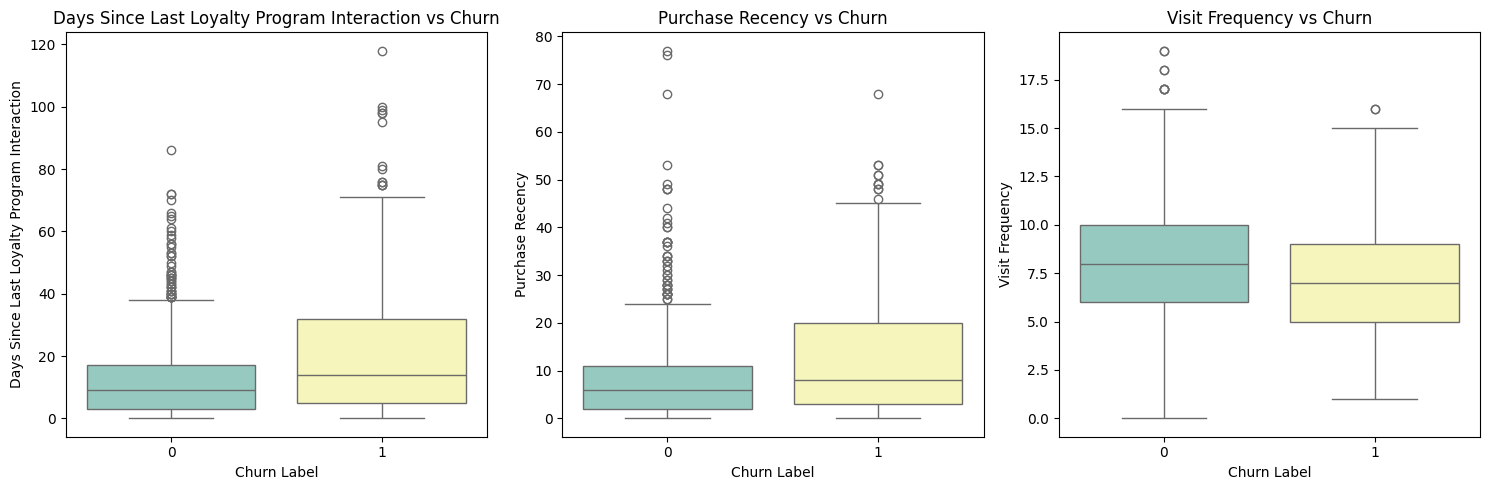
* **Days Since Last Loyalty Program Interaction:** Shows the clearest difference - non-churned customers have significantly more recent program interactions.
* **Purchase Recency:** Shows a slight difference - non-churned customers have somewhat more recent purchases, but with considerable overlap between groups.
* **Visit Frequency:** Non-churned customers visit slightly more frequently, but the substantial overlap suggests this is the weakest standalone predictor.

  > ***Loyalty program engagement is the strongest churn predictor, with purchase recency and visit frequency as secondary factors.***

### Top 3 Feature Importance
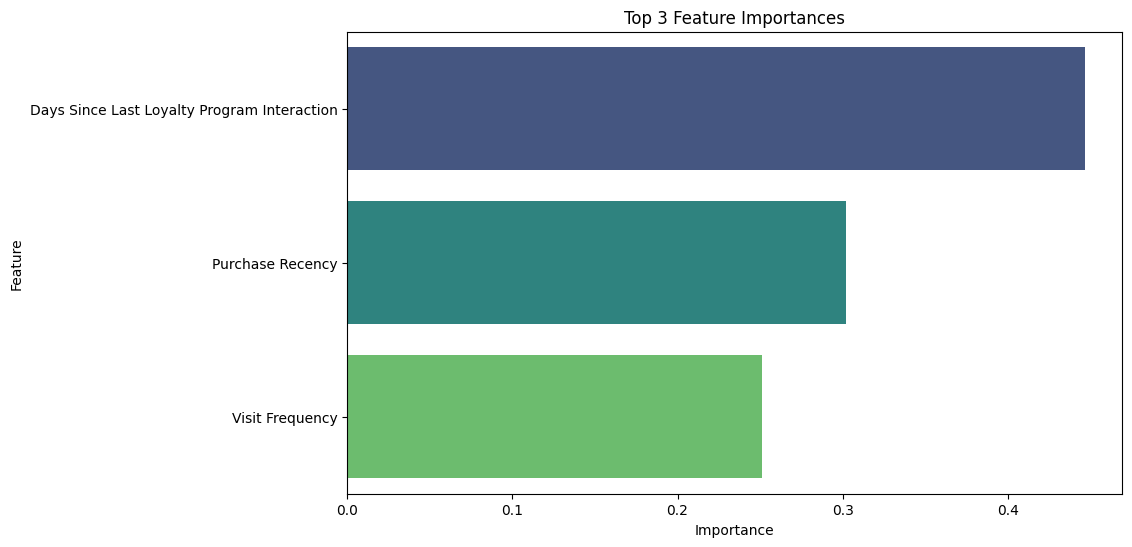
* **Days Since Last Loyalty Program Interaction** is by far the most important predictor of churn.
* **Purchase Recency** is the second most important factor, indicating how recently customers made purchases also strongly influences their likelihood to churn.
* **Visit Frequency** has the lowest importance among these top features, but still contributes meaningfully to the prediction model.
* **The substantial gap** between the first feature and the others suggests that customer engagement with the loyalty program itself is more critical than even purchase behavior in preventing churn.
* For your cafe business these results indicate that:
> ***re-engaging customers who haven't interacted with your loyalty program recently should be your highest priority for retention efforts.***



### Decision Tree
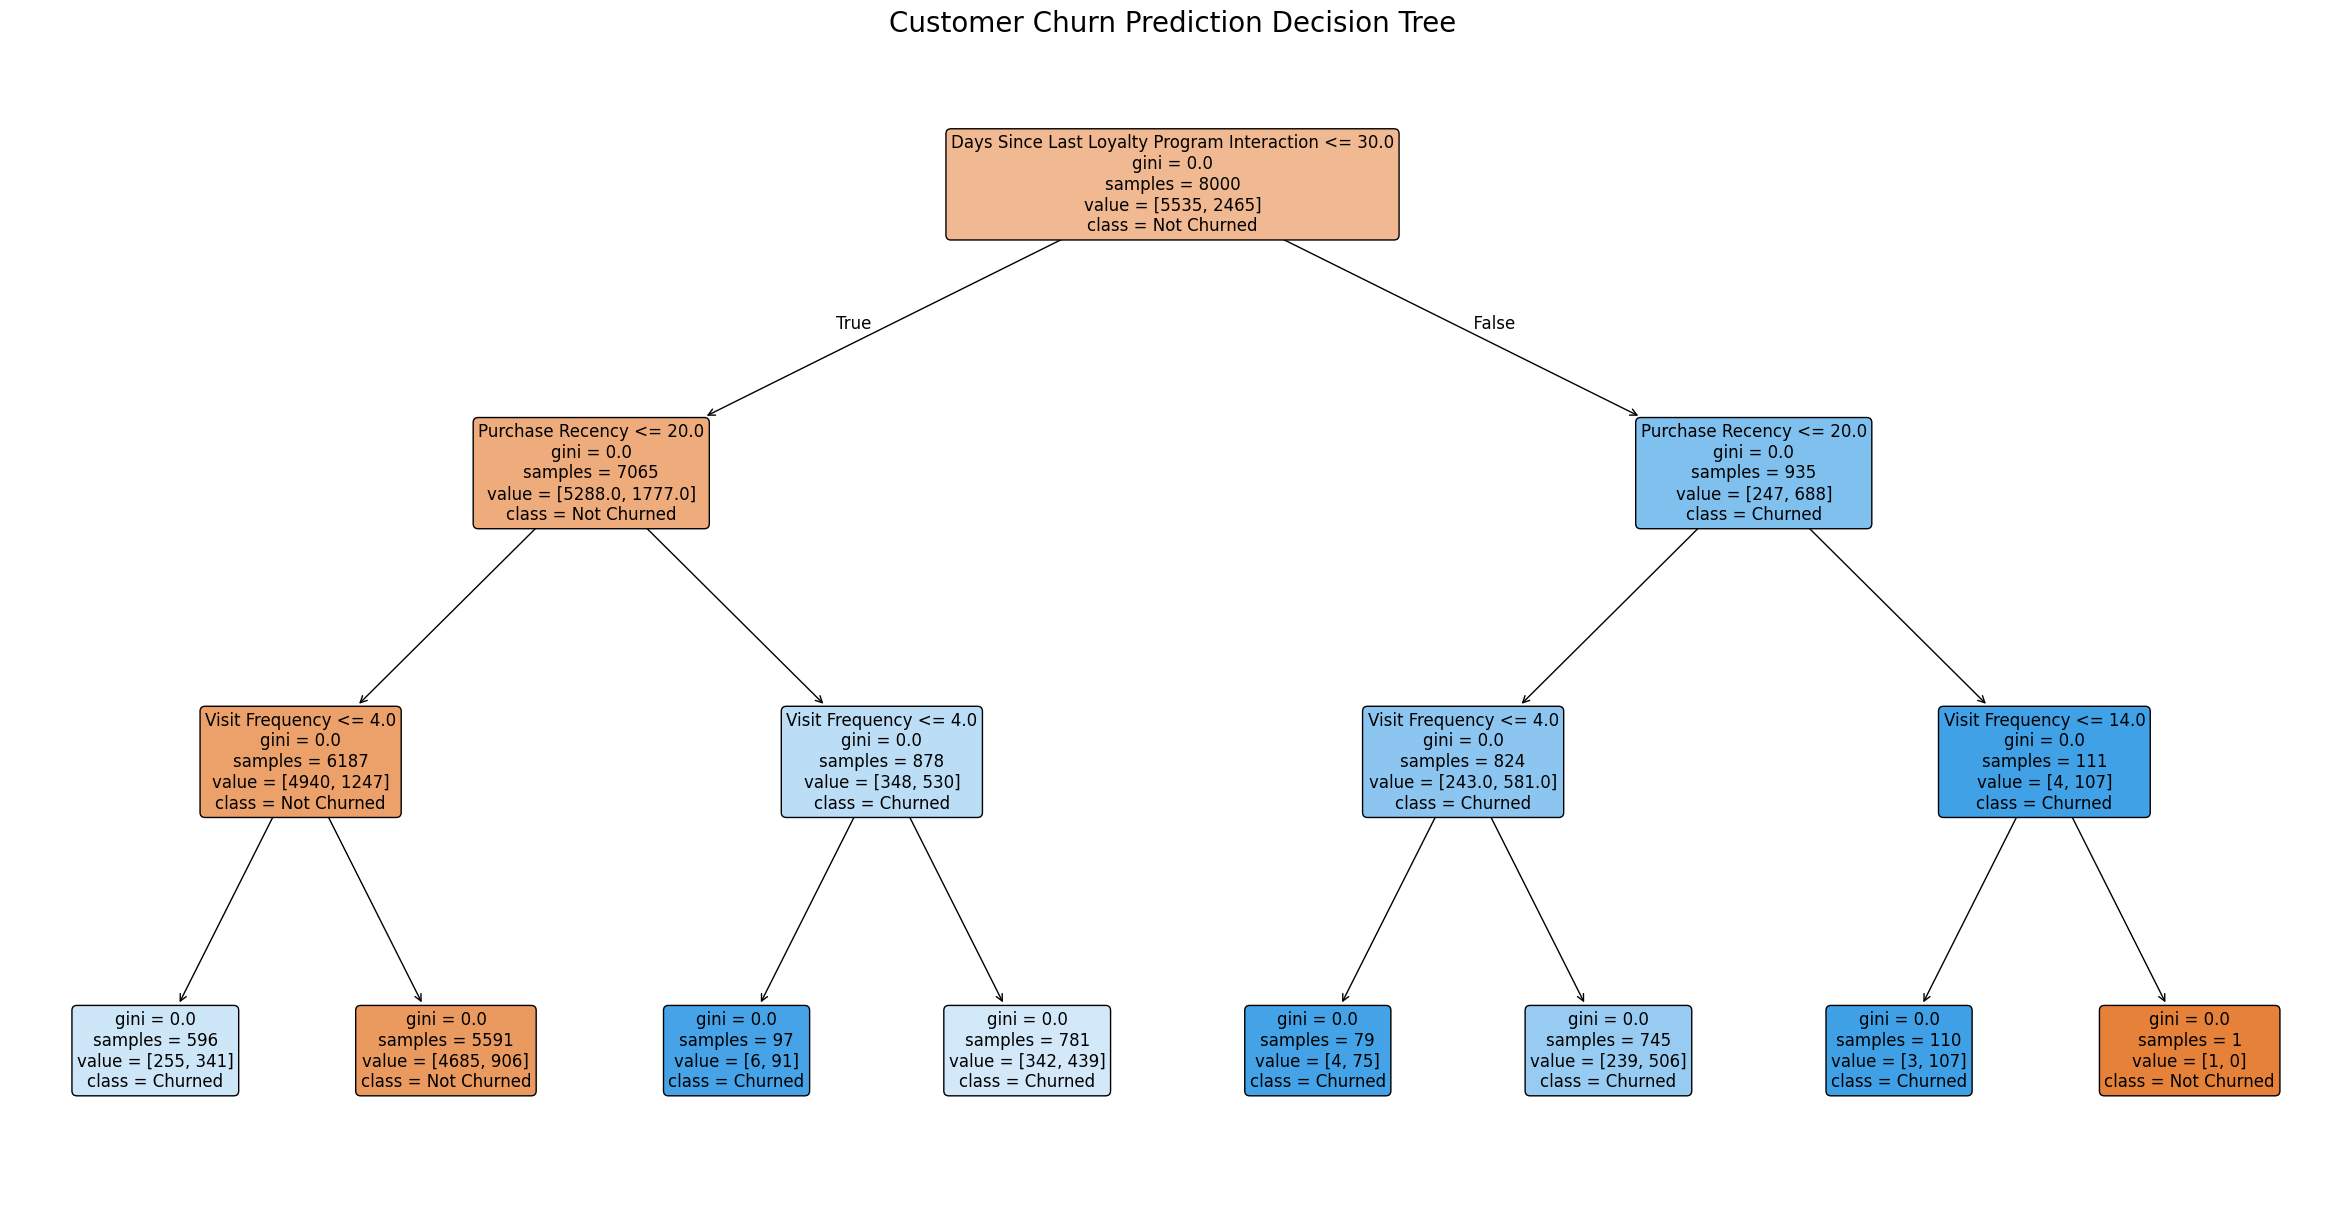
* **Critical Customer Segments:**
  * Most loyal customers: Recent loyalty program users (≤30 days) + recent purchasers (≤20 days) + frequent visit frequency (5 times / month) = 84% retention rate
  * Highest churn risk: Inactive loyalty program users (>30 days) = 74% churn probability


* **Action Plan Implications:**
  * Focus on re-engaging customers who haven't interacted with the loyalty program in over a month
  * Implement targeted campaigns for customers with recent purchases but declining loyalty program engagement
  * Monitor changes in visit frequency patterns as potential early warning signs of churn
